# Neural Network implementation using Keras and Tensorflow

In [6]:
import tensorflow as tf

tf.__version__

'2.9.1'

In [7]:
mnist = tf.keras.datasets.mnist

# 28x28 images of hand-written digits 0-9

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


In [14]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

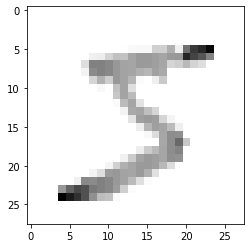

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [16]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='binary')
plt.show()

print(X_train[0])

In [17]:
model = tf.keras.models.Sequential()
"""
There are 2 types of models, (Sequential is the most common) 
"""

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) 
# final layer has only 10 output possibities

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 3)

2022-07-04 19:48:39.510690: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-04 19:48:39.511482: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-04 19:48:39.512590: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kanha): /proc/driver/nvidia/version does not exist
2022-07-04 19:48:39.516974: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/3


2022-07-04 19:48:39.875824: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2641 - accuracy: 0.9232
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1090 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0751 - accuracy: 0.9769


In [18]:
validation_loss, validation_accuracy = model.evaluate(X_test, y_test)
print(validation_loss, validation_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1031 - accuracy: 0.9680
0.10312215238809586 0.9679999947547913


In [19]:
# to save and load a model.

model.save('epic_number_reader.model')

INFO:tensorflow:Assets written to: epic_number_reader.model/assets


In [20]:
new_model = tf.keras.models.load_model('epic_number_reader.model')

In [21]:
predictions = new_model.predict([X_test])

print(predictions)

313/313 [==============================] - 0s 1ms/step
[[1.1260911e-08 1.5393040e-07 1.5391953e-07 ... 9.9997264e-01
  4.6827218e-08 2.1602960e-05]
 [1.4975269e-08 6.6427555e-04 9.9931449e-01 ... 1.0975466e-08
  1.1841499e-06 3.5460017e-11]
 [5.4283339e-07 9.9934858e-01 2.0939233e-05 ... 3.6207281e-04
  8.2477120e-05 1.2661358e-05]
 ...
 [3.9955950e-09 1.8336019e-06 4.0989150e-09 ... 2.2508246e-04
  1.0252459e-05 2.4467820e-04]
 [8.2233064e-06 9.0453995e-07 2.4935247e-09 ... 8.1584204e-07
  1.5898549e-04 8.4727674e-09]
 [3.8735361e-05 8.7767155e-08 3.5402611e-06 ... 2.5942077e-09
  2.9058031e-06 1.0655434e-07]]


In [22]:
# Each subarray contains probability distributions,
# and the one with the max probability distribution is the predicted number.
# For Eg:

import numpy as np

print(np.argmax(predictions[0]))

7


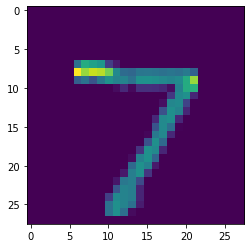

In [23]:
# the above result returns 7 which is the predicted number. 
# let's plot the 0th number to check...

plt.imshow(X_test[0])

### Some Notes:

1. 'Epoch' is just a "full pass" through your entire training dataset. So if you just train on 1 epoch, then the neural network saw each unique sample once. 3 epochs means it passed over your data set 3 times.
